# Collect data
1. Find yourself an data set that you want to analyse, this dataset has to be an csv file (excel), we are going to use this dataset in the coming weeks to give you real working experience.

    - The dataset can be from your own work of you can explore https://www.kaggle.com/datasets
    - Look for dataset with not to much columns
    
    
2. Write at least 3 questions down, you want to know from the data set
    - Do not go to hard on yourself

# Explain concepts

Because we all know how hard it is to explain concepts, that's why we need to practise. You do not have to type things done, just try to explain the concept to someone you know. Of course you can google first
1. Explain why we use the print statement

>  we use the print() funtion to print some message or to print an output from a function.

2. Explain why for loops are handy

> Loops are handy when you do not want to repeat a code, then you just loop through somethingh and it is done in much easier way.

3. What is the difference between a set, a tuple and a list

> There is a slight difference between all three python collections.
 > * List is ordered, changeable, allows duplicates and is written with square brackets.
 > * Tuple is simillar to list but the difference is that it is unchangeable and it is written with round brackets.
 > * Sets are totaly different than lists, they are unordered, unindexed, do not allows duplicates and are written with curly brackets.
 

4. Why do we need to use comments and how do you use them best

 > * The comments help to understand the script, especially it useful to understand the script that is written by someone else. 
 > * Also it is useful when we want to prevent some code to be executed.


### Dataset downloaded from Kaggle

Hearth Disease Dataset

https://www.kaggle.com/volodymyrgavrysh/heart-disease

#### Attribute Information:
- Age: Age

- Sex: Sex (1 = male; 0 = female)

- ChestPain: Chest pain (1-typical, 4- asymptotic, 3- nonanginal, 2- nontypical)
> Value 1: typical angina
> Value 2: atypical angina
> Value 3: non-anginal pain
> Value 4: asymptomatic

- trestbps: resting blood pressure (in mm Hg on admission to the hospital)

- RestBP: Resting blood pressure

- Chol: Serum cholestoral in mg/dl

- Fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

- RestECG: Resting electrocardiographic results

- MaxHR: Maximum heart rate achieved

- thalach: maximum heart rate achieved

- ExAng: Exercise induced angina (1 = yes; 0 = no)

- Oldpeak: ST depression induced by exercise relative to rest

- Slope: Slope of the peak exercise ST segment

- Ca: Number of major vessels colored by flourosopy (0 - 3)

- Thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)

- target: AHD - Diagnosis of heart disease (1 = yes; 0 = no)

### Questions

- How does it looklike distributions of age, sex, trestbps and chol variables?
- What is the number of femals and males that have hearth disease or not in study?
- Is there a relationship between the resting bllod pressure and serum cholesterol?
> also check is there difference between females and males and if they are diagnosed with heart disease or not.

In [52]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

%matplotlib inline

In [234]:
#import dataset
df = pd.read_csv('heart.csv')

#check first five rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [187]:
#check for the number of rows and columns
df.shape

(303, 14)

In [192]:
#check for duplicated rows
sum(df.duplicated())
df.drop_duplicates(inplace = True)

In [223]:
#check for the number of samples per cp categories
df.cp.value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

In [225]:
#check for Null values and Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [63]:
# problem with understanding cp variable
#plt.figure(figsize = (10,8))
#default_color = sb.color_palette()[0]
#sb.countplot(data = df, x = 'cp', hue= 'sex', color = default_color)
#my_xticks = ['Typical angina','Atypical angina','Non-anginal pain','Asymptomatic']
#x = np.array([0,1,2,3])
#plt.xticks(x, my_xticks)
#plt.xlabel('Chest Pain', fontsize=14);
#plt.ylabel('Frequency', fontsize=14);
#plt.title('Bar plot', fontsize=20);
#plt.legend(["Female", "Male"]);
#plt.show();

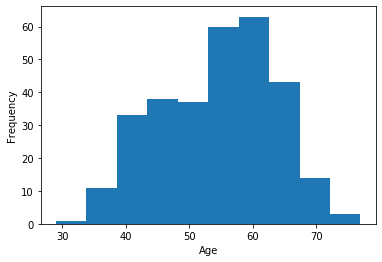

In [265]:
df['age'].plot.hist();
plt.xlabel('Age');

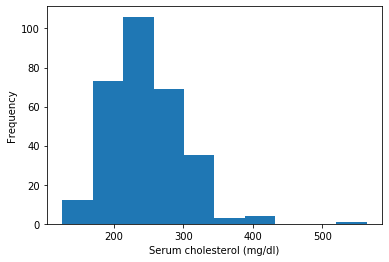

In [264]:
df['chol'].plot.hist();
plt.xlabel('Serum cholesterol (mg/dl)');

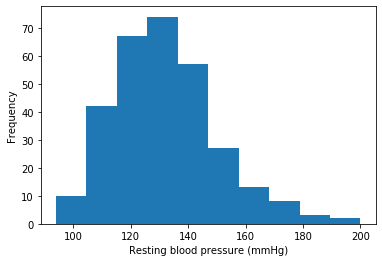

In [266]:
df['trestbps'].plot.hist();
plt.xlabel('Resting blood pressure (mmHg)');

##### Observations: 

The histograms of three variables: 'age', 'chol' and 'trestbps' shows normal distrubutions with some small exceptions which is reasonable taking into account the number of patients in study.


In [197]:
sex = df.groupby(['sex', 'target']).count()['age']
sex

sex  target
0    0          24
     1          72
1    0         114
     1          92
Name: age, dtype: int64

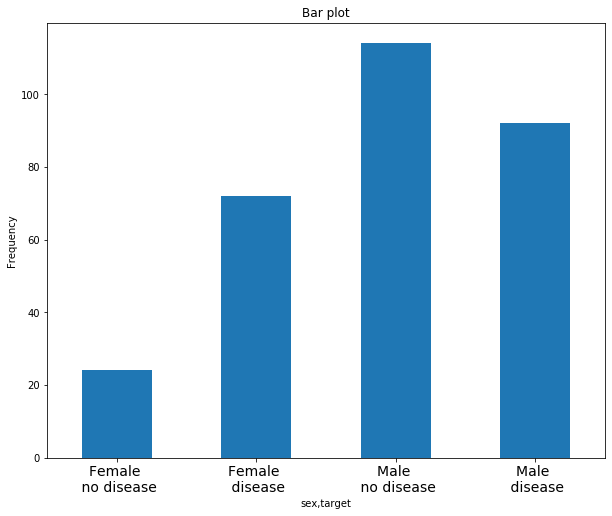

In [198]:
plt.figure(figsize=(10,8))
ax = sex.plot.bar(title='Bar plot');
ax.set_xticklabels(['Female \n no disease', 'Female \n disease', 'Male \n no disease', 'Male \n disease'], rotation = 0, fontsize = 14);
plt.ylabel('Frequency');

##### Observations: 
The bar plot shows the number of females with and without heart disease and the number of males with and without hearth disease.

We can observe that the lower number of female patients, but even lower number of females that are not diagnosed with hearth disease. An uneven groups could influence the analysis in a way that one group is more prefered than others. 

Advice: have more female participants in study would be appriciated.

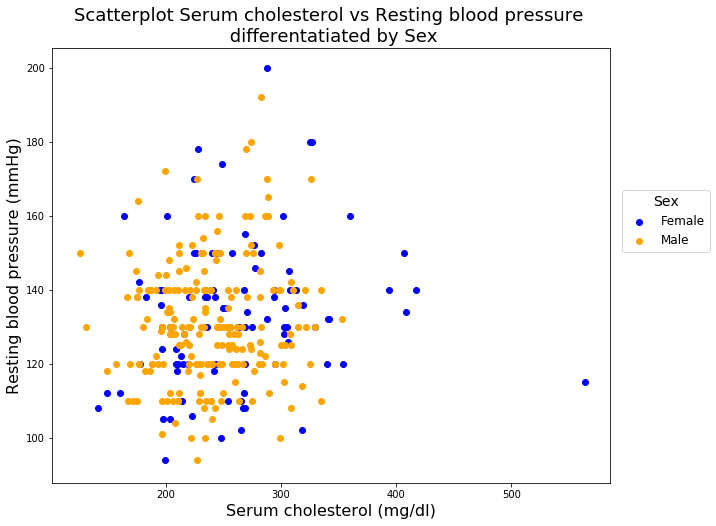

In [260]:
plt.figure(figsize=(10,8))
female = plt.scatter('chol', 'trestbps', data=df[df['sex']==0], marker='o', color='blue')
male = plt.scatter('chol', 'trestbps', data=df[df['sex']==1], marker='o', color='orange')
plt.legend(handles=(female, male),
           labels=('Female', 'Male'),
           title= "Sex", title_fontsize=14,
           scatterpoints=1,
           bbox_to_anchor=(1, 0.7), loc=2, borderaxespad=1.,
           ncol=1,
           fontsize=12)
plt.xlabel('Serum cholesterol (mg/dl)',fontsize = 16)
plt.ylabel('Resting blood pressure (mmHg)',fontsize = 16)
plt.title('Scatterplot Serum cholesterol vs Resting blood pressure \n differentatiated by Sex', fontsize = 18)
plt.show();

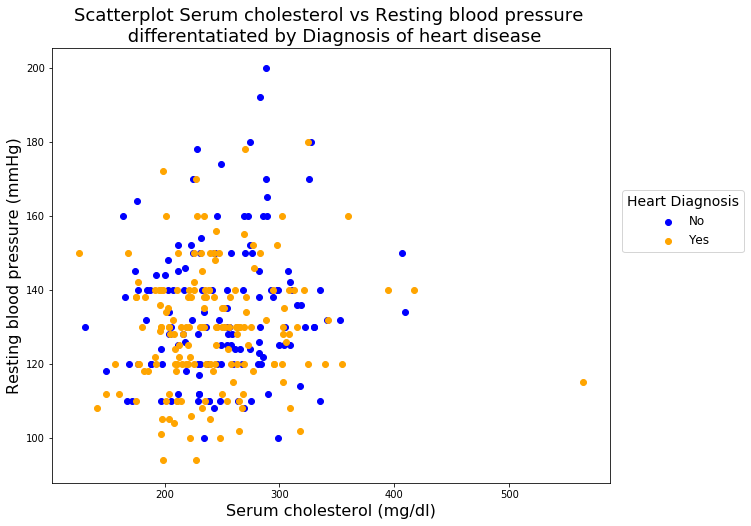

In [267]:
plt.figure(figsize=(10,8))
no = plt.scatter('chol', 'trestbps', data=df[df['target']==0], marker='o', color='blue')
yes = plt.scatter('chol', 'trestbps', data=df[df['target']==1], marker='o', color='orange')
plt.legend(handles=(no, yes),
           labels=('No', 'Yes'),
           title= "Heart Diagnosis", title_fontsize=14,
           scatterpoints=1,
           bbox_to_anchor=(1, 0.7), loc=2, borderaxespad=1.,
           ncol=1,
           fontsize=12)
plt.xlabel('Serum cholesterol (mg/dl)',fontsize = 16)
plt.ylabel('Resting blood pressure (mmHg)',fontsize = 16)
plt.title('Scatterplot Serum cholesterol vs Resting blood pressure \n differentatiated by Diagnosis of heart disease', fontsize = 18)
plt.show();

##### Observations:

Here is shown the scatterplot where we can observe a positive relationship between the resting blood pressure and the serum cholesterol. Also I have decided to colored observations in order to see if we can observe difference between patients that are diagnosed with heart disease or not.

As we can see on this plot there is not a clear difference between these two groups. 

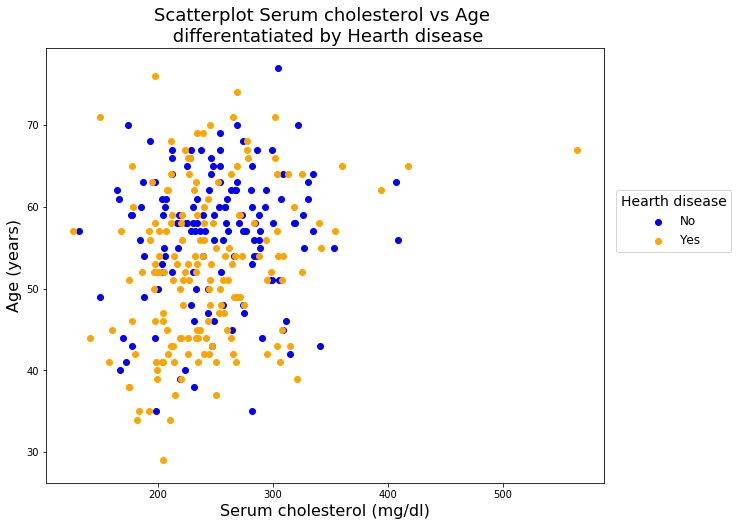

In [258]:
plt.figure(figsize=(10,8))
no = plt.scatter('chol', 'age', data=df[df['target']==0], marker='o', color='blue')
yes = plt.scatter('chol', 'age', data=df[df['target']==1], marker='o', color='orange')
plt.legend(handles=(no, yes),
           labels=('No', 'Yes'),
           title= "Hearth disease", title_fontsize=14,
           scatterpoints=1,
           bbox_to_anchor=(1, 0.7), loc=2, borderaxespad=1.,
           ncol=1,
           fontsize=12)
plt.xlabel('Serum cholesterol (mg/dl)',fontsize = 16)
plt.ylabel('Age (years)',fontsize = 16)
plt.title('Scatterplot Serum cholesterol vs Age \n differentatiated by Hearth disease', fontsize = 18)
plt.show();

##### Observations:

On plot above we can observe a positive relationship between age and level of serum cholesterol. What is also interesting here is that people in this study with no diagnosed heart disease tend to be than 50 years, which makes more difficult to make group by age and conduct some analysis taking the age into account. That should be investigate more later on.

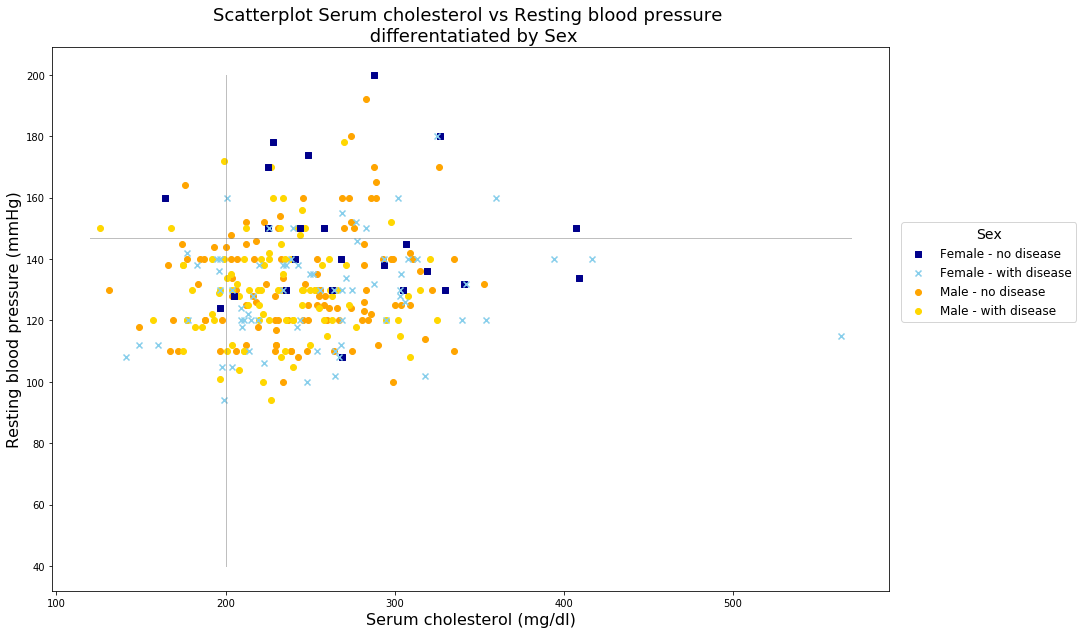

In [257]:
plt.figure(figsize=(15,10))
plt.plot([120, 570], [147,147], 'k-', lw=1, color = 'grey', alpha = 0.5) # red line which is denotate the maximum of normal blood pressure for older generation
plt.plot([200, 200], [40,200], 'k-', lw=1, color = 'grey', alpha = 0.5) # red line which is denotate the maximum of normal blood pressure for older generation

male_nodis = plt.scatter('chol', 'trestbps', data=df[(df['sex']==1) & (df['target']==0)], marker='o', color='orange')
male_dis = plt.scatter('chol', 'trestbps', data=df[(df['sex']==1) & (df['target']==1)], marker='o', color='gold')

female_nodis = plt.scatter('chol', 'trestbps', data=df[(df['sex']==0) & (df['target']==0)], marker='s', color='darkblue')
female_dis = plt.scatter('chol', 'trestbps', data=df[(df['sex']==0) & (df['target']==1)], marker='x', color='skyblue')

plt.legend(handles=(female_nodis,female_dis, male_nodis, male_dis),
           labels=('Female - no disease', 'Female - with disease', 'Male - no disease', 'Male - with disease'),
           title= "Sex", title_fontsize=14,
           scatterpoints=1,
           bbox_to_anchor=(1, 0.7), loc=2, borderaxespad=1.,
           ncol=1,
           fontsize=12)

#plt.xlim([250,300])

#plt.ylim([100,140])

plt.xlabel('Serum cholesterol (mg/dl)',fontsize = 16)
plt.ylabel('Resting blood pressure (mmHg)',fontsize = 16)
plt.title('Scatterplot Serum cholesterol vs Resting blood pressure \n differentatiated by Sex', fontsize = 18)
plt.show();

#### Observations:

This plot is showin relationship between Resting blood pressure and Serum cholesterol which is positive. Besides, by using colors and different marks we showed four different groups: females and males with no diagnosed heart disease and females and males with diagnosed heart disease.

We can see that there are more males in this study than females, moreover there is also a small number of females that are not diagnosed with heart disease. This dataset should have a greater number of sampled groups which should have simillar number of patients.

The grey lines are showing the maximum value of blood pressure which is shown for age group between 60 - 64 years, and the maximum value of healty serum cholestorol level.

In [254]:
# the picture below is taken from https://www.idealbloodpressureinfo.com/blood-pressure-chart-by-age/

from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.idealbloodpressureinfo.com/wp-content/uploads/2013/09/blood-pressure-chart-by-age1.png")


#https://www.newhealthadvisor.org/Resting-Blood-Pressure.html
#https://www.healthline.com/health/serum-cholesterol#results